## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset

In [2]:
data = pd.read_csv('fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
data.shape

(17880, 18)

In [4]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.describe(include = 'O').T

,count,unique,top,freq
title,17880,11231,English Teacher Abroad,311
location,17534,3105,"GB, LND, London",718
department,6333,1337,Sales,551
salary_range,2868,874,0-0,142
company_profile,14572,1709,We help teachers get safe &amp; secure jobs ab...,726
description,17879,14801,"Play with kids, get paid for it Love travel? J...",379
requirements,15185,11968,University degree required. TEFL / TESOL / CEL...,410
benefits,10670,6205,See job description,726
employment_type,14409,5,Full-time,11620
required_experience,10830,7,Mid-Senior level,3809


In [6]:
job = data.groupby(by = 'industry').sum().sort_values('fraudulent', ascending = False).reset_index()

In [7]:
job

,industry,job_id,telecommuting,has_company_logo,has_questions,fraudulent
0,Oil & Energy,2119613,3,232,165,109
1,Accounting,1603214,5,61,40,57
2,Hospital & Health Care,4302800,3,377,265,51
3,Marketing and Advertising,7552029,30,686,415,45
4,Financial Services,6352823,17,670,315,35
...,...,...,...,...,...,...
126,Internet,9553772,97,971,718,0
127,International Trade and Development,73806,0,3,1,0
128,Industrial Automation,63959,0,2,2,0
129,Individual & Family Services,101741,0,9,8,0


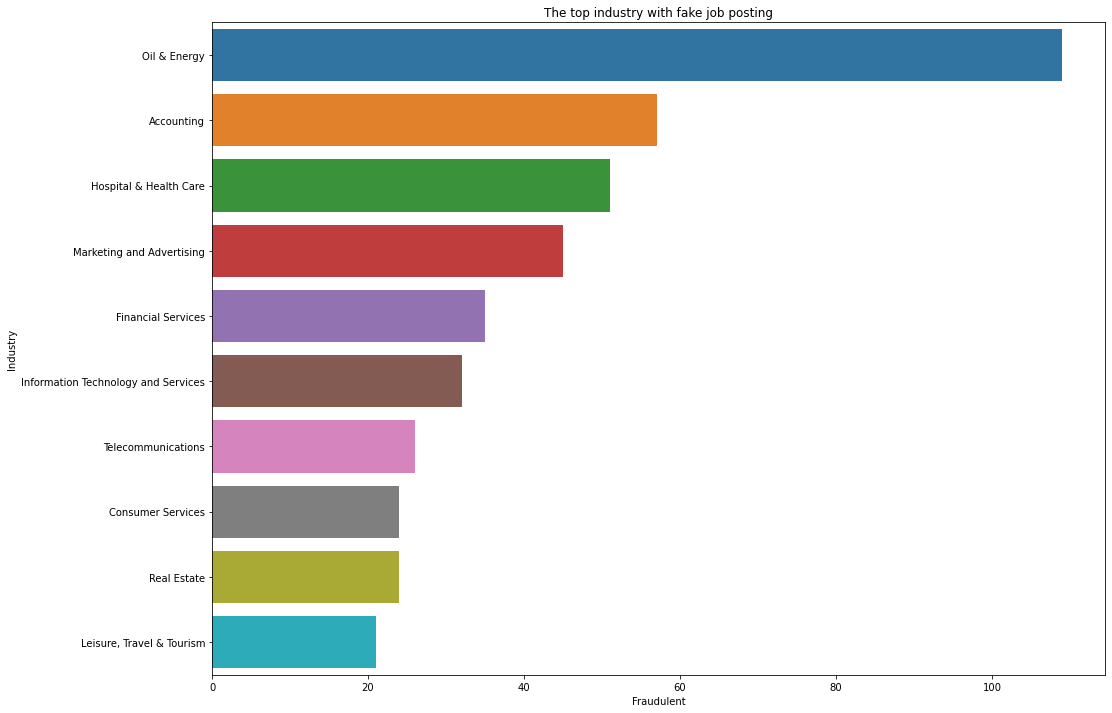

In [8]:
plt.figure(figsize=(16,12))
sns.barplot(data = job.iloc[:10], y = 'industry', x ='fraudulent')
plt.title('The top industry with fake job posting')
plt.xlabel('Fraudulent')
plt.ylabel('Industry')
plt.show()